# Ultimate Inc Take Home Challenge, Daniel Loew, Springboard
# Part I: EDA

The Ultimate Inc take-home challenge focuses on examining usage patterns, driver behavior, and rider retention for a large taxi alternative company called Ultimate Inc. This first notebook uses simulated timestamps to illustrate the underlying patterns of demand for the service.

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

In [2]:
data_path = "/Users/DanLoew/Documents/Academia/Springboard/DSCT/17.2.2 Ultimate Technologies Take Home Challenge/ultimate_challenge/logins.json"
df = pd.DataFrame(pd.read_json(data_path))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [7]:
print(type(df['login_time'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [8]:
type(df)

pandas.core.frame.DataFrame

There are no missing values in the 'login_time' series.

In [9]:
df.isnull().sum()

login_time    0
dtype: int64

In [10]:
df.isna().sum()

login_time    0
dtype: int64

There are no unusual, erroneous or outlying values, except for the fact that the year is 1970.

In [11]:
df['login_time'].value_counts()

1970-02-12 11:16:53    3
1970-02-24 23:09:57    3
1970-03-29 03:24:57    3
1970-03-14 17:45:52    3
1970-01-09 01:31:25    3
1970-01-06 21:45:52    3
1970-04-04 01:17:40    3
1970-04-12 04:03:15    3
1970-03-17 01:01:39    3
1970-03-13 22:30:55    2
1970-03-06 01:39:41    2
1970-02-02 02:55:50    2
1970-04-11 04:26:02    2
1970-02-06 17:00:50    2
1970-01-02 22:11:16    2
1970-02-25 21:42:36    2
1970-02-13 00:16:29    2
1970-02-21 00:11:08    2
1970-03-07 21:43:35    2
1970-02-20 01:12:24    2
1970-01-24 05:54:34    2
1970-03-24 22:37:58    2
1970-03-24 01:20:06    2
1970-02-21 15:41:56    2
1970-02-11 11:03:31    2
1970-02-07 04:44:18    2
1970-03-15 00:41:20    2
1970-04-05 00:34:37    2
1970-02-02 03:33:36    2
1970-02-08 14:12:52    2
                      ..
1970-02-13 22:44:33    1
1970-02-10 18:59:59    1
1970-02-07 15:15:33    1
1970-03-25 23:50:04    1
1970-03-29 18:37:18    1
1970-03-28 01:16:25    1
1970-02-20 09:54:44    1
1970-03-15 23:00:11    1
1970-03-09 13:16:52    1


A duplicate column of 'login_time' is created so that the pd.Grouper method can be used to give us a frequency distribution of timestamps in 15 minute intervals can be examined.

In [13]:
df['login_time_ts'] = df['login_time']
df.head()

,login_time,login_time_ts
0,1970-01-01 20:13:18,1970-01-01 20:13:18
1,1970-01-01 20:16:10,1970-01-01 20:16:10
2,1970-01-01 20:16:37,1970-01-01 20:16:37
3,1970-01-01 20:16:36,1970-01-01 20:16:36
4,1970-01-01 20:26:21,1970-01-01 20:26:21


In [15]:
fifteen_min_intervals = df.groupby(pd.Grouper(key='login_time', freq='15min')).count()
fifteen_min_intervals

,login_time_ts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


The next set of cells extracts the month, day, and hour data from the 'login_time_ts' timestamp data for visualization of time cycles of log-ins.

In [20]:
df['month'] = df.login_time_ts.dt.month
df.head()

,login_time,login_time_ts,month
0,1970-01-01 20:13:18,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1970-01-01 20:26:21,1


In [21]:
df.tail()

,login_time,login_time_ts,month
93137,1970-04-13 18:50:19,1970-04-13 18:50:19,4
93138,1970-04-13 18:43:56,1970-04-13 18:43:56,4
93139,1970-04-13 18:54:02,1970-04-13 18:54:02,4
93140,1970-04-13 18:57:38,1970-04-13 18:57:38,4
93141,1970-04-13 18:54:23,1970-04-13 18:54:23,4


In [22]:
df['day'] = df.login_time_ts.dt.day
df.head()

,login_time,login_time_ts,month,day
0,1970-01-01 20:13:18,1970-01-01 20:13:18,1,1
1,1970-01-01 20:16:10,1970-01-01 20:16:10,1,1
2,1970-01-01 20:16:37,1970-01-01 20:16:37,1,1
3,1970-01-01 20:16:36,1970-01-01 20:16:36,1,1
4,1970-01-01 20:26:21,1970-01-01 20:26:21,1,1


In [23]:
df.tail()

,login_time,login_time_ts,month,day
93137,1970-04-13 18:50:19,1970-04-13 18:50:19,4,13
93138,1970-04-13 18:43:56,1970-04-13 18:43:56,4,13
93139,1970-04-13 18:54:02,1970-04-13 18:54:02,4,13
93140,1970-04-13 18:57:38,1970-04-13 18:57:38,4,13
93141,1970-04-13 18:54:23,1970-04-13 18:54:23,4,13


In [24]:
df['hour'] = df.login_time_ts.dt.hour
df.head()

,login_time,login_time_ts,month,day,hour
0,1970-01-01 20:13:18,1970-01-01 20:13:18,1,1,20
1,1970-01-01 20:16:10,1970-01-01 20:16:10,1,1,20
2,1970-01-01 20:16:37,1970-01-01 20:16:37,1,1,20
3,1970-01-01 20:16:36,1970-01-01 20:16:36,1,1,20
4,1970-01-01 20:26:21,1970-01-01 20:26:21,1,1,20


In [25]:
df.tail()

,login_time,login_time_ts,month,day,hour
93137,1970-04-13 18:50:19,1970-04-13 18:50:19,4,13,18
93138,1970-04-13 18:43:56,1970-04-13 18:43:56,4,13,18
93139,1970-04-13 18:54:02,1970-04-13 18:54:02,4,13,18
93140,1970-04-13 18:57:38,1970-04-13 18:57:38,4,13,18
93141,1970-04-13 18:54:23,1970-04-13 18:54:23,4,13,18


In [26]:
month = df['month'].value_counts().sort_index()
month

1    21239
2    24673
3    33723
4    13507
Name: month, dtype: int64

Although the data on Ultimate's user log-ins only covers January through February, one can clearly see that March was Ultimate's best month with 33,723 log-ins. January was much lower at 21,239 log-ins, February improved to 24,673 log-ins, and after March's peak, log-ins in April plunged to their lowest levels at 13,507 log-ins. One would expect even more users in April as the weather gets warmer and more people spend time outdoors, so there must be some unusual issue that affected April log-ins so negatively. The much lower number of log-ins in April warrants a deep dive beyond the log-in data to determine what was responsible for this low point in Ultimate's user engagement.

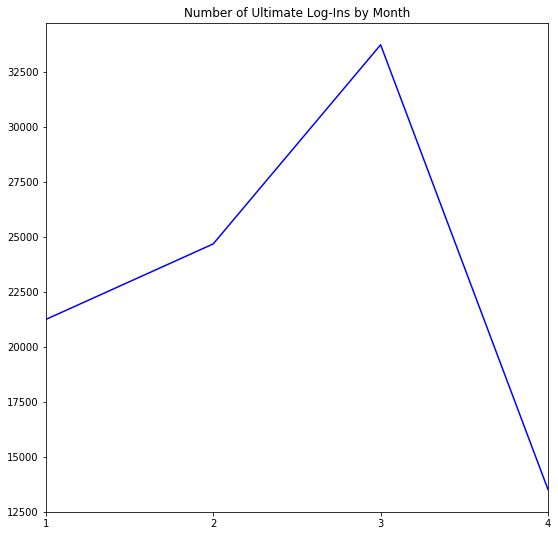

In [27]:
month.plot(xticks=[1, 2, 3, 4], figsize=(9, 9), c='blue', title='Number of Ultimate Log-Ins by Month')

In [28]:
day = df['day'].value_counts().sort_index()
day

1     3194
2     3044
3     3475
4     4037
5     3223
6     3281
7     4006
8     4019
9     2832
10    3297
11    3863
12    3614
13    3021
14    3426
15    3331
16    2215
17    3044
18    2945
19    2859
20    2885
21    3487
22    3507
23    2233
24    2318
25    2348
26    2176
27    2735
28    3540
29    2197
30    1415
31    1575
Name: day, dtype: int64

The following plot shows the number of log-ins by day of the month averaged over January through April. Although the numbers see-saw quite a bit, one can see a generally higher number of log-ins within the first 12 days of the month. The low number of log-ins on the 31st day makes sense as only January and March have 31 days and the data is shown across all four months. The low number of log-ins on the 30th day makes sense as well as only April (out of January-April) has 30 days. The steep dives on the 16th of the month, as well as on the 23rd-26th of the month, should be investigated. Also, the reason for the peaks in the early part of the month should be further explored.

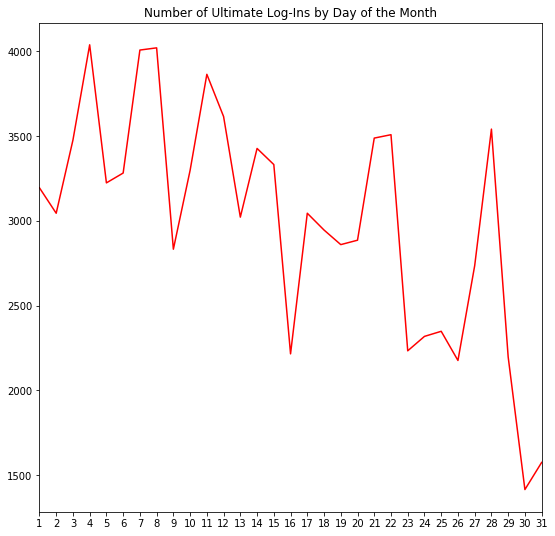

In [29]:
day.plot(xticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 
                27, 28, 29, 30, 31], figsize=(9, 9), c='red', title='Number of Ultimate Log-Ins by Day of the Month')

In [30]:
hour = df['hour'].value_counts().sort_index()
hour

0     5993
1     6317
2     5800
3     4831
4     5034
5     2945
6     1138
7      815
8      818
9     1527
10    3064
11    5799
12    4964
13    3611
14    3426
15    3038
16    2832
17    2584
18    2980
19    3235
20    4103
21    5623
22    6607
23    6058
Name: hour, dtype: int64

One can clearly see that there are two peaks in Ultimate log-ins. One can see a peak in use late at night between 9 pm - 1 am, and a peak at 11 am. It looks like people are using Ultimate for going out at night, and for the morning commute. One can see a low point however at the evening commute, which presents an opportunity for Ultimate to gain more market share, and a need to research why far less people are using the service for the evening commute than the morning commute.

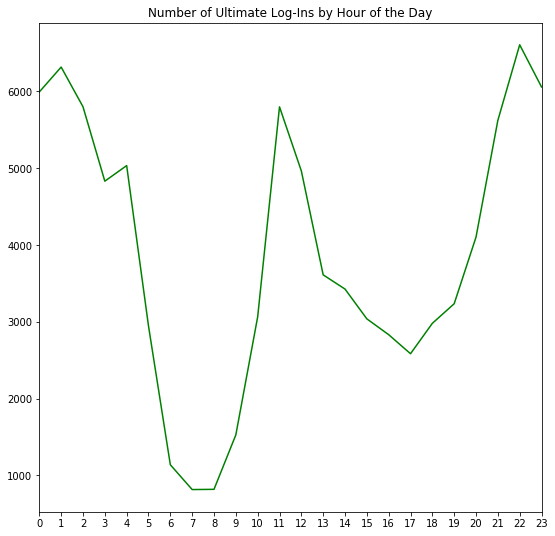

In [31]:
hour.plot(xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 
         figsize=(9, 9), c='green', title='Number of Ultimate Log-Ins by Hour of the Day')

These plots show the general usage patterns of the Ultimate Inc service, and present a series of problem areas that the company needs to investigate to improve their performance.